Baseado em alguns dados (relacionado a e-commerce), datados de 2016 a 2018, eu busquei por meio destes uma maneira de expressar quais estados do Brasil tinham os maiores pedidos, para que não ficasse um gráfico muito grande eu limitei para apenas 10 estados. Começando pelo básico, que serão as importações dos pacotes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Começamos inserindo no df os dados ao qual temos as colunas do id do consumidor, o id único do consumidor, código da caixa postal, cidade do consumidor e estado do consumidor (ao qual focaremos aqui apenas estado)

In [2]:
df = pd.read_csv("olist_customers_dataset.csv")

Usando a função head para ter uma noção dos dados que posso usar (estado)

In [3]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Inicialmente eu faria apenas os maiores estados que tiveram os maiores pedidos, mas algo que me chamou atenção foram as formas de pagamentos, então acabei pegando também os dados dos pagamentos para utilizá-los mais a frente. Salvei esses dados no df1

In [4]:
df1 = pd.read_csv("olist_order_payments_dataset.csv")

E também utilizei a função head para ver quais colunar mais eu poderia utilizar.

In [5]:
df1.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


Aqui eu vou me preocupar mais com a quantidade das parcelas do que com o valor ou tipo do pagamento. Levarei em consideração que tanto boleto quanto cartão de crédito parcelado em 1 serão à vista, me preocupando assim somente com a quantidade de parcelas.

E adicionando agora salvaremos o último df para pegarmos a coluna que serão das datas ao qual as vendas foram efetuadas (para que possamos contar de forma correta quantas vendas ocorreram nesse período de tempo)

In [6]:
df2 = pd.read_csv('olist_orders_dataset.csv')

In [7]:
df2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Aqui estou considerando apenas a data de quando a venda foi concluída, assim minimizando os erros de datas

Agora iremos pegar a coluna do df1 (a quantidade de parcelas, ou como está lá, 'payment_installments') e do df2 (data do pedido, ou como está lá, 'order_approved_at') e passar para o nosso df principal (já nomeando a coluna como "parcelas")

In [8]:
df_analise = pd.DataFrame()
df_analise['estado_cliente'] = df['customer_state']
df_analise['parcelas'] = df1['payment_installments']
df_analise['data_pedido'] = df2['order_approved_at']

garantindo que está tudo corretamente, usamos mais uma vez a função

In [9]:
df_analise.head()

,estado_cliente,parcelas,data_pedido
0,SP,8,2017-10-02 11:07:15
1,SP,1,2018-07-26 03:24:27
2,SP,1,2018-08-08 08:55:23
3,SP,8,2017-11-18 19:45:59
4,SP,2,2018-02-13 22:20:29


Por eu perceber que já teria que repetir ou até mesmo criar muitas variáveis para vários motivos e que isso ficaria muito longo ou até mesmo "poluido", resolvi criar funções para que ficasse mais "limpo"

In [10]:
def Figura(posicoes, largura, altura):
    posicoes = range(len(posicoes))
    plt.figure(figsize=(len(posicoes)* largura, altura))

def Plot_Barra(posicoes, altura, largura):
    posicoes =  range(len(posicoes))
    altura = altura.values
    plt.bar(posicoes, altura, width=largura)

def Rotacao(posicoes, variavel, rotacao):
    posicoes = range(len(posicoes))
   
    plt.xticks(posicoes, variavel.index, rotation = rotacao)
    
def Eixos(titulo, x, y):
    titulo = plt.title(titulo)
    x = plt.xlabel(x)
    y = plt.ylabel(y)    

E logo em seguida já comecei a fazer as linhas de código.

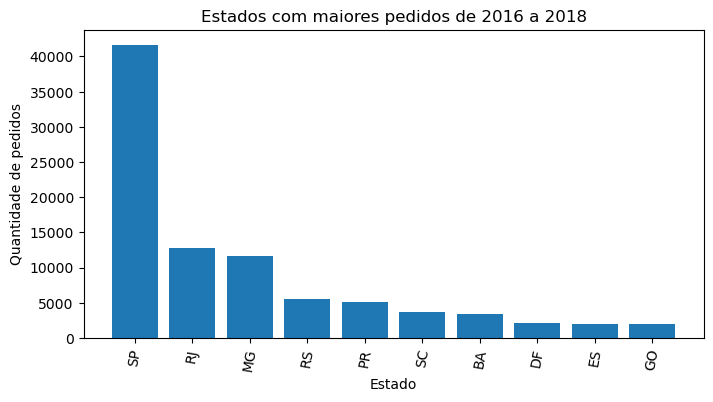

In [11]:
#calcular o número de pedidos
pedido_por_estado = df_analise.groupby('estado_cliente')['data_pedido'].count()

#ordenar os estados em ordem decrescente
pedido_por_estado= pedido_por_estado.sort_values(ascending = False)

#pegar os top 10 estados com maiores pedidos
top_estado = pedido_por_estado.head(10)

#criar a figura de acordo com os parâmetros
Figura(top_estado,0.8,4)

#plotar o gráfico de barras
Plot_Barra(top_estado, top_estado,0.8)

#rotacionar os rótulos de x e adicionar o nome dos estados
Rotacao(top_estado,top_estado,80)

#adicionar o rótulo aos eixos
Eixos('Estados com maiores pedidos de 2016 a 2018', 'Estado', 'Quantidade de pedidos')

#mostrando o gráfico
plt.show()

Foi então que me veio a dúvida. De todas essas vendas, quantas foram à vista (considerando à vista parcelamentos em 1 vez ou boletos) e quantas foram parceladas?

Nessa parte eu também migrei para criar funções para manter mais "clean", mas não poderia usar as que eu já tinha criado por conta de aqui ter parâmetros a mais fora a questão de que aqui usaremos um outro método ao qual não se encaixa nas definições acima (apenas a dos Eixos e Figura poderiam ser reutilizada por ainda manter o mesmo padrão até certo ponto)

In [12]:
def Barra(arg1, arg2, largura, rotulo):
    plt.bar(arg1, arg2, width=largura, label=rotulo)
    
def Rotac(arg1, largura, variavel, rotacao):
    plt.xticks(arg1 + largura / 2, variavel.index, rotation = rotacao)

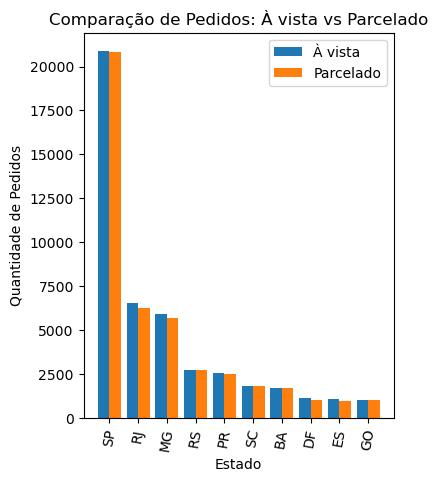

In [13]:
# Calcular o número total de pedidos por estado
pedido_por_estado_total = df_analise.groupby('estado_cliente')['data_pedido'].count()

# Calcular o número de pedidos à vista por estado (parcela única)
pedidos_vista = df_analise[df_analise['parcelas'] == 1]
pedido_vista_por_estado = pedidos_vista.groupby('estado_cliente')['data_pedido'].count()

# Calcular o número de pedidos parcelados por estado (mais de uma parcela)
pedidos_parcelados = df_analise[df_analise['parcelas'] > 1]
pedido_parcelado_por_estado = pedidos_parcelados.groupby('estado_cliente')['data_pedido'].count()

# Ordenar os estados em ordem decrescente
pedido_por_estado_total = pedido_por_estado_total.sort_values(ascending=False)

# Pegar os top 10 estados com maiores pedidos
top_estado = pedido_por_estado_total.head(10)

# Obter os valores de pedidos à vista e parcelados para os top 10 estados
pedidos_vista_top_estado = pedido_vista_por_estado[top_estado.index]
pedidos_parcelados_top_estado = pedido_parcelado_por_estado[top_estado.index]

# Criar as posições das barras para as categorias de pagamento
posicoes_vista = np.arange(len(top_estado))
posicoes_parcelados = posicoes_vista + 0.4

# Criar a figura do gráfico de barras    
Figura(top_estado, 0.4, 5)

# Plotar as barras para pedidos à vista e parcelados
Barra(posicoes_vista, pedidos_vista_top_estado, 0.4,'À vista' )
Barra(posicoes_parcelados, pedidos_parcelados_top_estado, 0.4, 'Parcelado')

# Rotacionar os rótulos de x e adicionar o nome dos estados
Rotac(posicoes_vista, 0.4, top_estado, 80)

# Adicionar o rótulo aos eixos
Eixos('Comparação de Pedidos: À vista vs Parcelado', 'Estado', 'Quantidade de Pedidos') 

#Adicionar legenda
plt.legend()

# Mostrar o gráfico
plt.show()

Podemos ver que em questão do estado com a maior venda é SP, e que dos top 10 estados com maiores pedidos, eles predominaram com o pagamento à vista, mas com uma diferença "pouca" também comparado ao parcelado.